# Project 2
DAT301 Summer24A <br>
Kevin Nangcas (knangcas@asu.edu)

## Introduction / Questions
This project will be a continuation of my project 1. <br>
I will be using the Pima Indians Diabetes Database dataset from kaggle. <br>
Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database <br>

Diabetes is very prelevant in the world, and sometimes it can go undiagnosed. Can we use machine learning algorithms, given some data, to predict if someone has diabetes? If predicted true, doctors can call these patients for further evaluation. If false, doctors can give a notification stating that they are likely not diabetic, helping make doctors work more efficient. 

In my previous project, I used the K-Nearest Neighbor method to predict whether a patient was diabetic or not. <br>
In this project, I will code the project1 again, but in python, and compare my results. In addition, I will use another classification algorithm, logistic regression, and see if logistic regression is a better model or not for predicting diabetes. 

Questions: Can we use machine learning algorithms to predict diabetes? 
To what accuracy can logistic regression predict diabetes in comparison to KNN that was used in the previous project? Will this be a more effective method? For reference, I was able to predict diabetes with an ~84% accuracy in the first project. 



In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("diabetes5.csv")
df


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Data

The data has 768 rows with 9 columns. According to the source,
<ul>
<li>-Pregnancies is the number of pregnancies a patient has had. </li>
<li>-Glucose is Plasma glucose concentration a 2 hours in an oral glucose tolerance test. </li>
<li>-BloodPressure is Diastolic in mm Hg. </li>
<li>-SkinThickness is triceps skin fold in mm. </li>
<li>-Insulin is 2-Hour serum insulin in mu U/ml. </li>
<li>-BMI is body mass index.</li>
<li>-DiabetesPedigreeFunction is Diabetes Pedigree Function.</li>
<li>-Age is age in years. </li>
<li>-Outcome is the outcome (1 = diabetic, 0 = non-diabetic). </li>
</ul>


## Cleaning up data

There were rows in this data set that contained 0s in columns such as glucose, blood pressure, skin thickness, insulin, and BMI. These have been replaced with the median of the columns with respect to the outcome. Data was also normalized. 


In [5]:
#clean data
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

df1 = df[(df['Outcome']==1) & (df['Glucose'] !=0) & (df['BloodPressure'] !=0) & 
         (df['SkinThickness'] !=0) & (df['Insulin'] !=0) & (df['BMI'] !=0)].copy()

##gathering medians
mGlu1 = df1['Glucose'].median()
mBP1 = df1['BloodPressure'].median()
mST1 = df1['SkinThickness'].median()
mIns1 = df1['Insulin'].median()
mBMI1 = df1['BMI'].median()

df0 = df[(df['Outcome']==0) & (df['Glucose'] !=0) & (df['BloodPressure'] !=0) & 
         (df['SkinThickness'] !=0) & (df['Insulin'] !=0) & (df['BMI'] !=0)].copy()


##gathering medians
mGlu0 = df0['Glucose'].median()
mBP0 = df0['BloodPressure'].median()
mST0 = df0['SkinThickness'].median()
mIns0 = df0['Insulin'].median()
mBMI0 = df0['BMI'].median()

df1 = df[(df['Outcome']==1)].copy()

df0 = df[(df['Outcome']==0)].copy()


df1['Glucose'].mask(df1['Glucose'] == 0, mGlu1, inplace=True)
df1['BloodPressure'].mask(df1['BloodPressure'] == 0, mBP1, inplace=True)
df1['SkinThickness'].mask(df1['SkinThickness'] == 0, mST1, inplace=True)
df1['Insulin'].mask(df1['Insulin'] == 0, mIns1, inplace=True)
df1['BMI'].mask(df1['BMI'] == 0, mBMI1, inplace=True)
df1['Outcome'].mask(df1['Outcome'] == 1, "Diabetic", inplace=True)

df0['Glucose'].mask(df0['Glucose'] == 0, mGlu0, inplace=True)
df0['BloodPressure'].mask(df0['BloodPressure'] == 0, mBP0, inplace=True)
df0['SkinThickness'].mask(df0['SkinThickness'] == 0, mST0, inplace=True)
df0['Insulin'].mask(df0['Insulin'] == 0, mIns0, inplace=True)
df0['BMI'].mask(df0['BMI'] == 0, mBMI0, inplace=True)
df0['Outcome'].mask(df0['Outcome'] == 0, "Non-Diabetic", inplace=True)

dfclean = pd.concat([df1,df0], sort=False).sort_index()

In [6]:
print((dfclean['Glucose']==0).any())
print((dfclean['BloodPressure']==0).any())
print((dfclean['SkinThickness']==0).any())
print((dfclean['Insulin']==0).any())
print((dfclean['BMI']==0).any())
dfclean.head()

False
False
False
False
False


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72             35    169.5  33.6   
1            1     85.0             66             29    105.0  26.6   
2            8    183.0             64             33    169.5  23.3   
3            1     89.0             66             23     94.0  28.1   
4            0    137.0             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age       Outcome  
0                     0.627   50      Diabetic  
1                     0.351   31  Non-Diabetic  
2                     0.672   32      Diabetic  
3                     0.167   21  Non-Diabetic  
4                     2.288   33      Diabetic

In [7]:
## normalize data
dfknn = dfclean.copy()
dflogr = dfclean.copy()
for column in dfknn.columns:
    if column == "Outcome":
        continue
    dfknn[column] = (dfknn[column] - dfknn[column].min()) / (dfknn[column].max() - dfknn[column].min())

groups = df.groupby('Outcome')
dfknn.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.186899  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.109375  0.171779   
2     0.470588  0.896774       0.408163       0.282609  0.186899  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age       Outcome  
0                  0.234415  0.483333      Diabetic  
1                  0.116567  0.166667  Non-Diabetic  
2                  0.253629  0.183333      Diabetic  
3                  0.038002  0.000000  Non-Diabetic  
4                  0.943638  0.200000      Diabetic

## Exploring the data


Here, I will take a look at the data in the data set by plotting the variables against each other with respect to the outcome. 



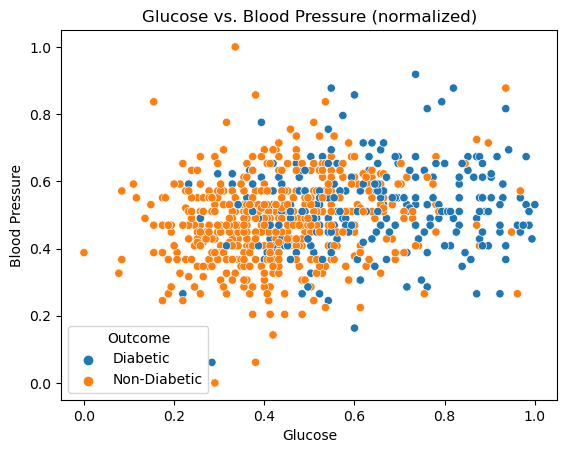

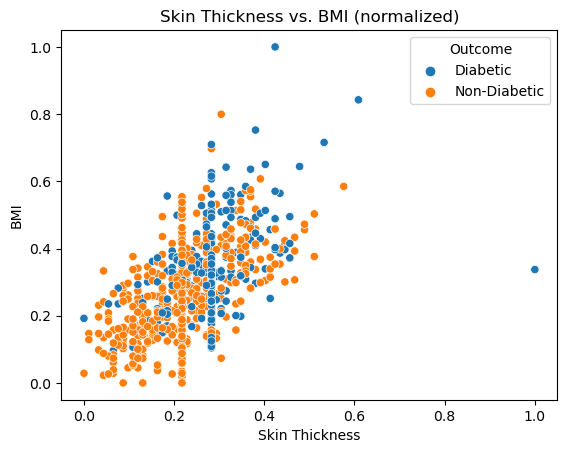

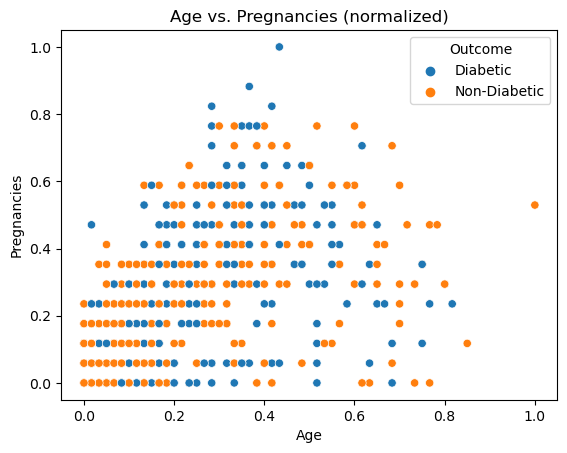

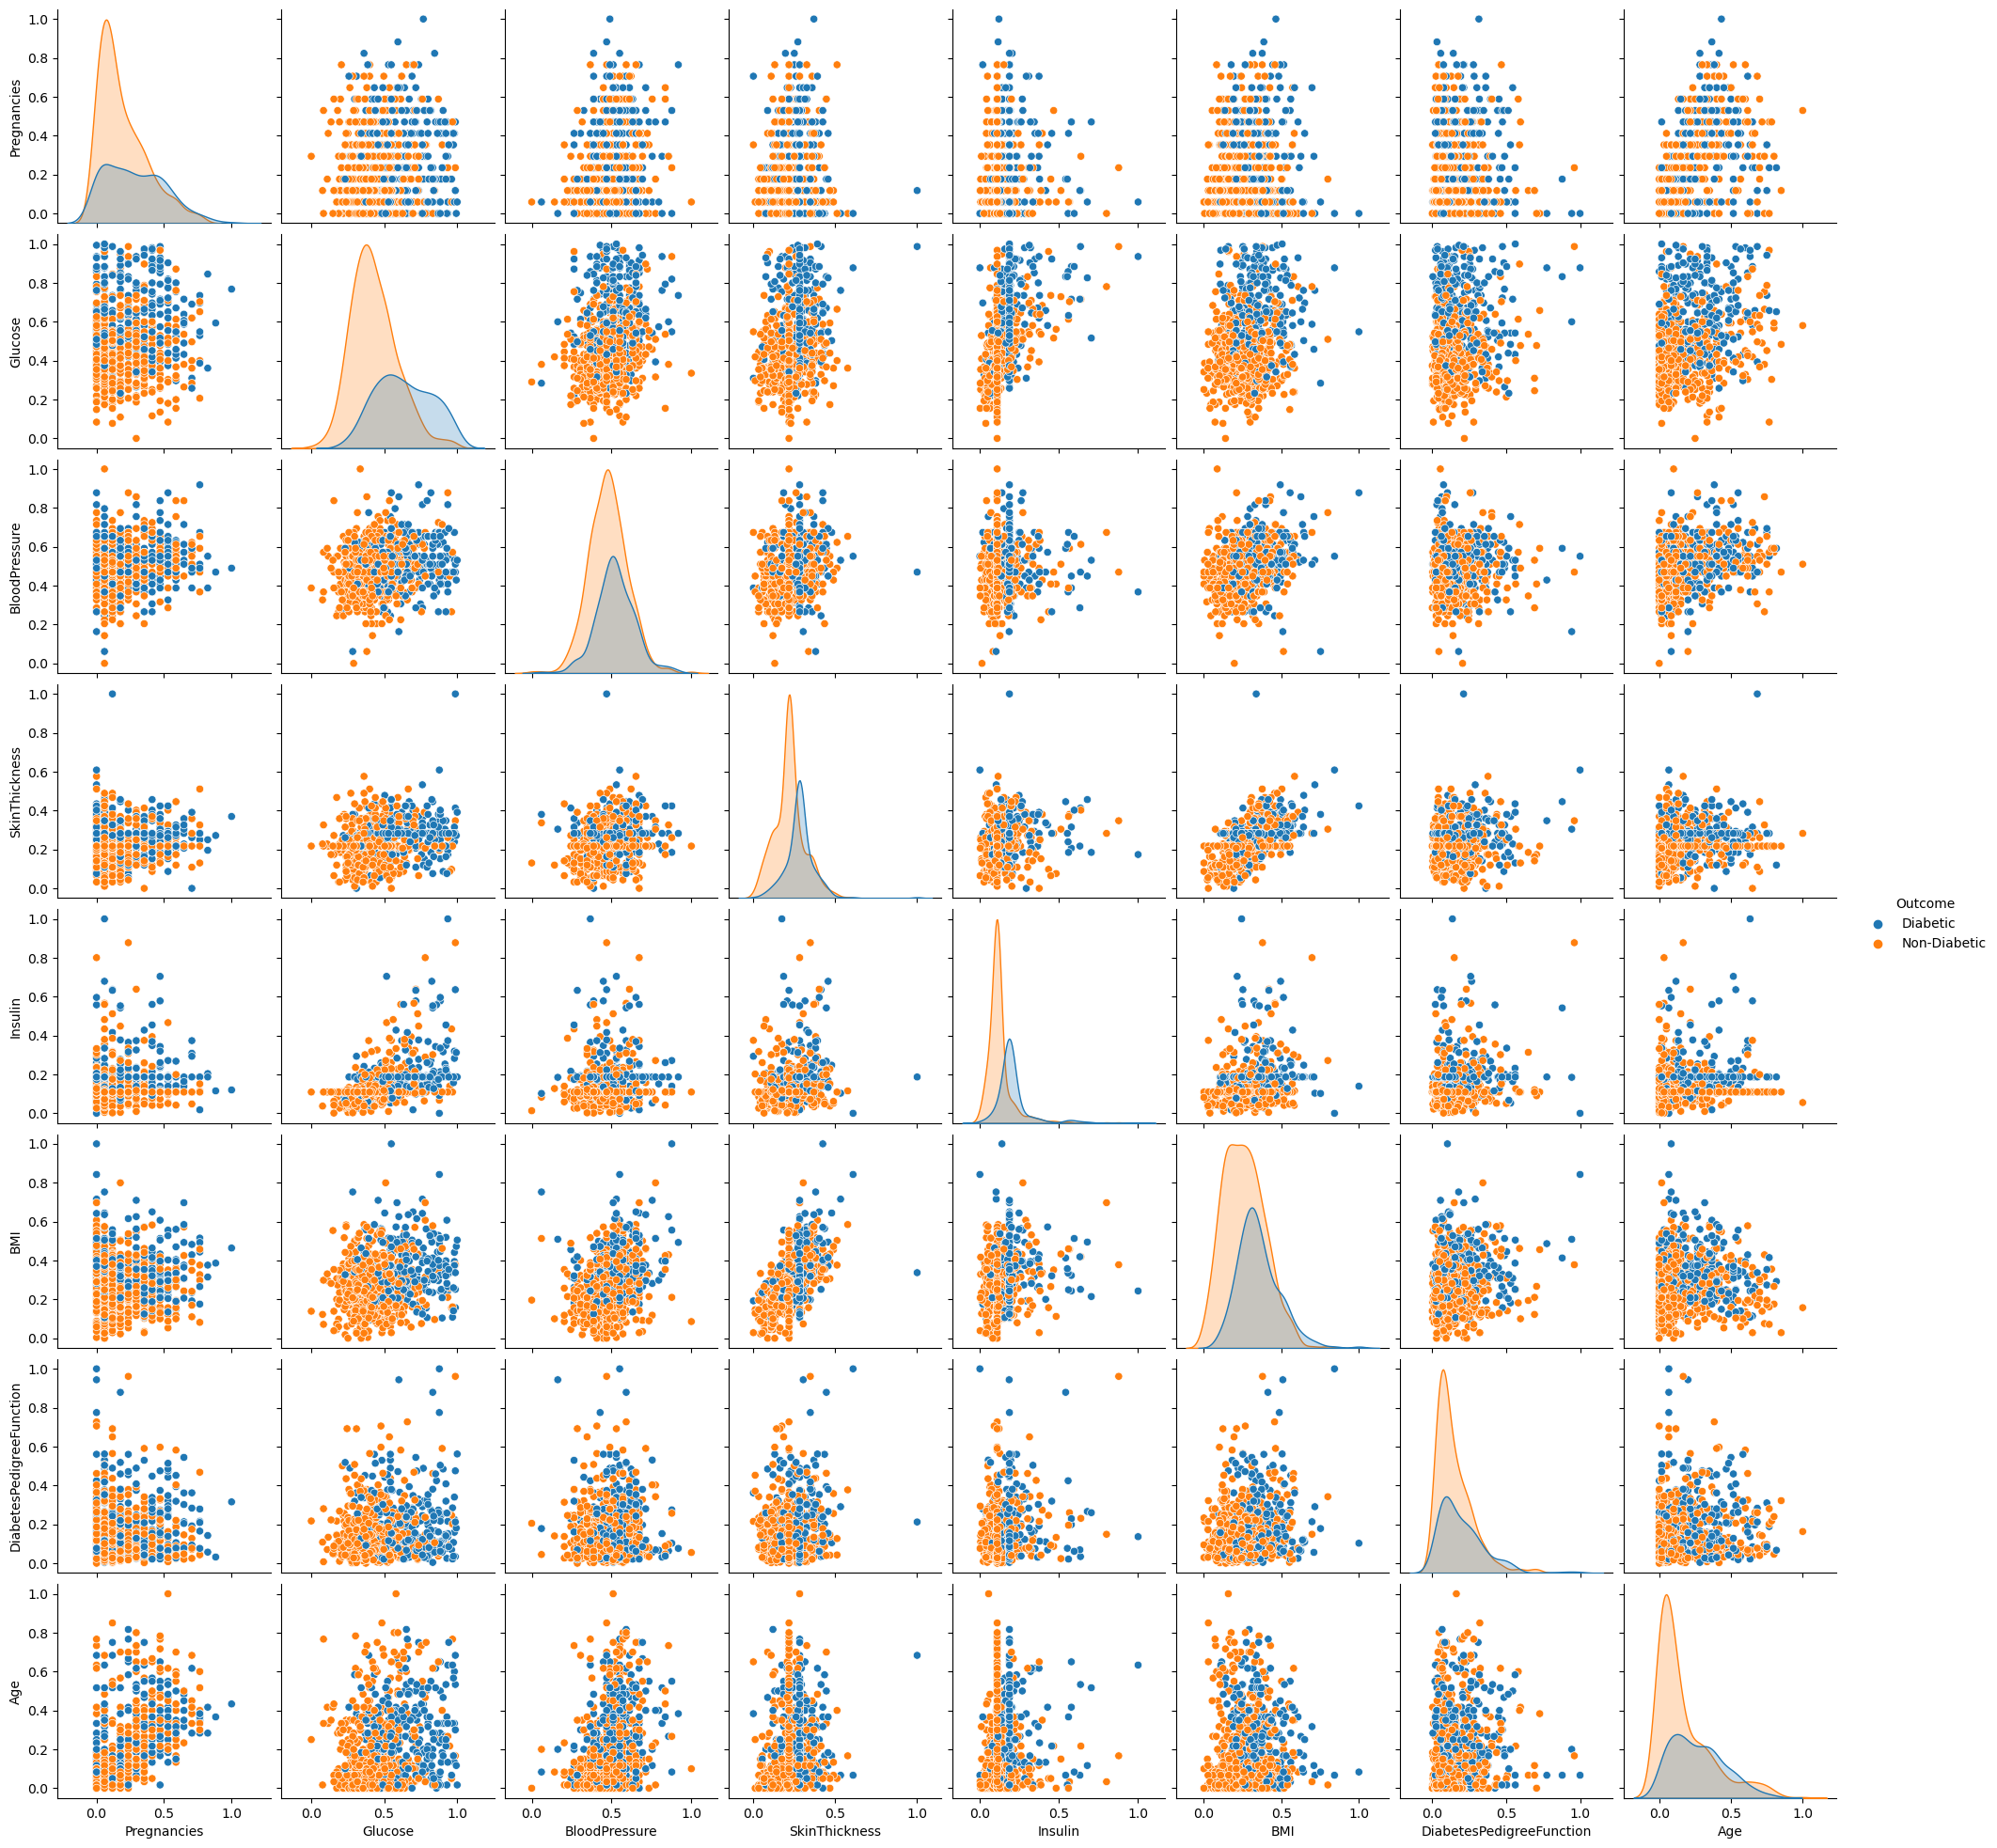

In [9]:
import seaborn as sns

sns.scatterplot(x="Glucose", y = "BloodPressure", data=dfknn, hue="Outcome",  legend=True)
plt.xlabel("Glucose")
plt.ylabel("Blood Pressure")
plt.title("Glucose vs. Blood Pressure (normalized)")
plt.show()

sns.scatterplot(x="SkinThickness", y = "BMI", data=dfknn, hue="Outcome", legend=True)
plt.xlabel("Skin Thickness")
plt.ylabel("BMI")
plt.title("Skin Thickness vs. BMI (normalized)")
plt.show()

sns.scatterplot(x="Age", y = "Pregnancies", data=dfknn, hue="Outcome", legend=True)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.title("Age vs. Pregnancies (normalized)")
plt.show()

sns.pairplot(dfknn, hue="Outcome")
plt.show()

### Observations
There is some separation within these few features of the dataset between diabetics and non-diabetics.

## Graphing variables against outcome

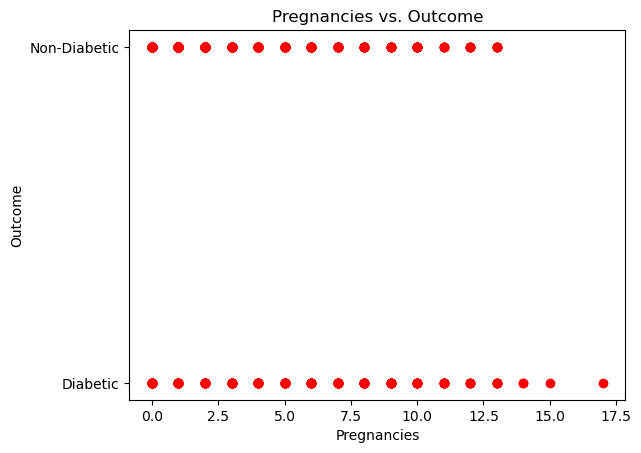

In [12]:
## Pregnancies vs. Outcome

plt.scatter(dfclean.Pregnancies, dfclean.Outcome, color='red')
plt.xlabel("Pregnancies")
plt.ylabel("Outcome")
plt.title("Pregnancies vs. Outcome")
plt.show()

This graph suggests that number of pregnancies doesn't determine diabetes. 

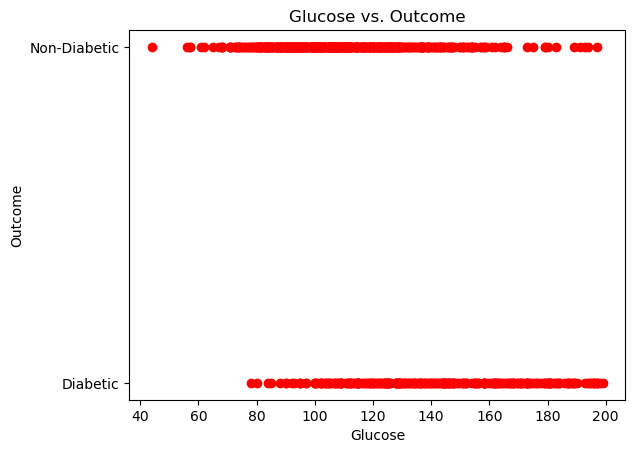

In [14]:
plt.scatter(dfclean.Glucose, dfclean.Outcome, color='red')
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Glucose vs. Outcome")
plt.show()

This graph suggests that non-diabetics have a higher range of glucose than diabetics.

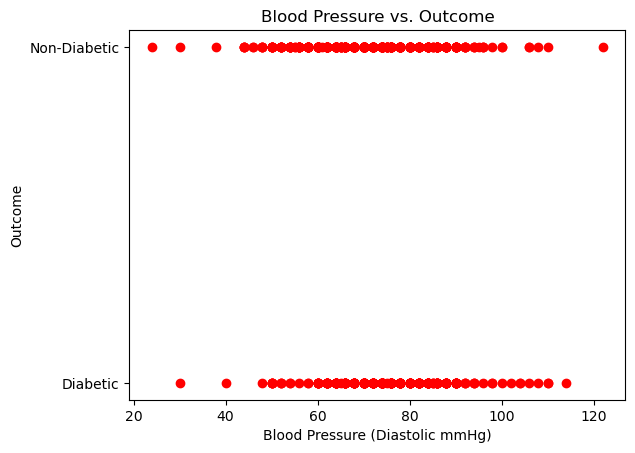

In [16]:
plt.scatter(dfclean.BloodPressure, dfclean.Outcome, color='red')
plt.xlabel("Blood Pressure (Diastolic mmHg)")
plt.ylabel("Outcome")
plt.title("Blood Pressure vs. Outcome")
plt.show()

Overall, diabetics have higher blood pressure. 

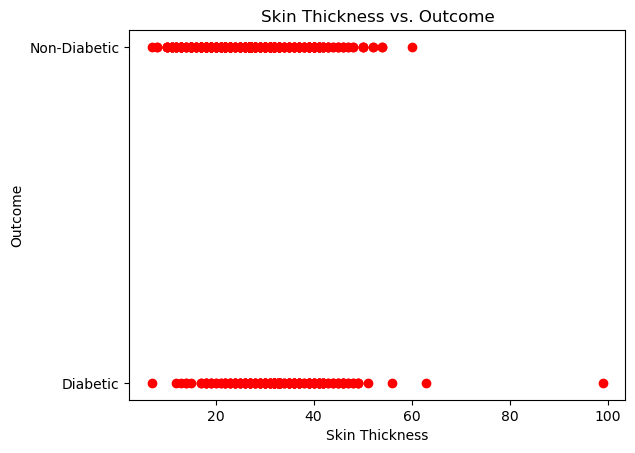

In [18]:
plt.scatter(dfclean.SkinThickness, dfclean.Outcome, color='red')
plt.xlabel("Skin Thickness")
plt.ylabel("Outcome")
plt.title("Skin Thickness vs. Outcome")
plt.show()

This graph shows roughly the same results for both groups, aside from an outlier. 

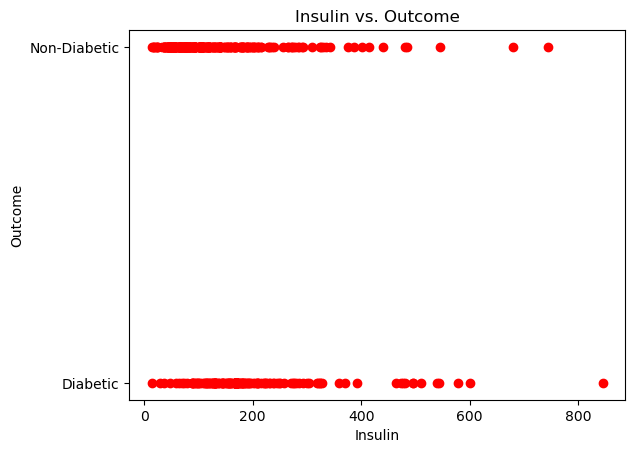

In [20]:
plt.scatter(dfclean.Insulin, dfclean.Outcome, color='red')
plt.xlabel("Insulin")
plt.ylabel("Outcome")
plt.title("Insulin vs. Outcome")
plt.show()

This graph shows slightly higher levels of insulin for diabetics.

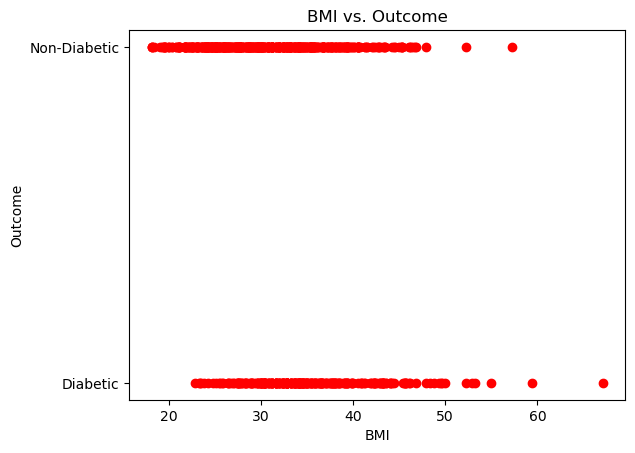

In [22]:
plt.scatter(dfclean.BMI, dfclean.Outcome, color='red')
plt.xlabel("BMI")
plt.ylabel("Outcome")
plt.title("BMI vs. Outcome")
plt.show()

This graph suggests that higher diabetes have overall higher BMI.

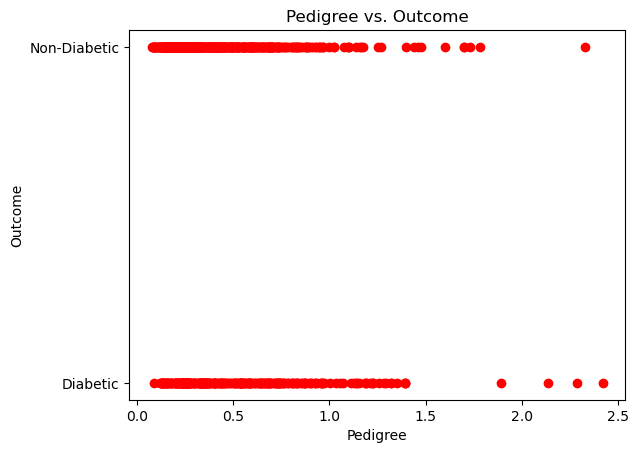

In [24]:
plt.scatter(dfclean.DiabetesPedigreeFunction, dfclean.Outcome, color='red')
plt.xlabel("Pedigree")
plt.ylabel("Outcome")
plt.title("Pedigree vs. Outcome")
plt.show()

Non-diabetics have a broader range, while diabetics have a few outliers. 

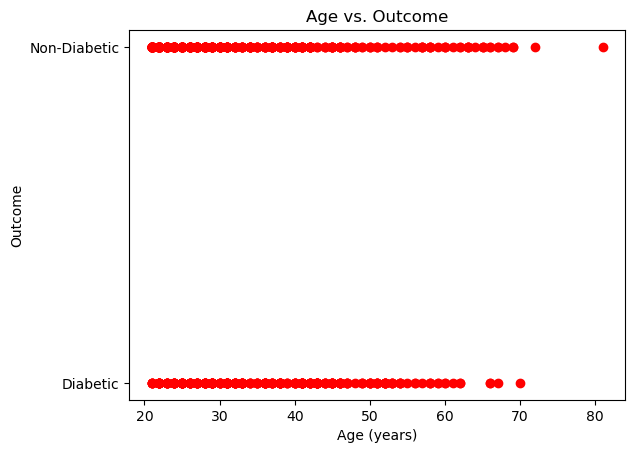

In [26]:
plt.scatter(dfclean.Age, dfclean.Outcome, color='red')
plt.xlabel("Age (years)")
plt.ylabel("Outcome")
plt.title("Age vs. Outcome")
plt.show()

Age is more or less the same. This may also suggest non-diabetics live longer? 

# Using K-Nearest Neighbor to predict diabeties

First, I will use the k-nearest neighbor classification method to predict diabetes. In my first project written in R, I was able to get an accuracy of ~84%. I will see if I can match this in Python.

I will separate the data 80:20 just like before. 



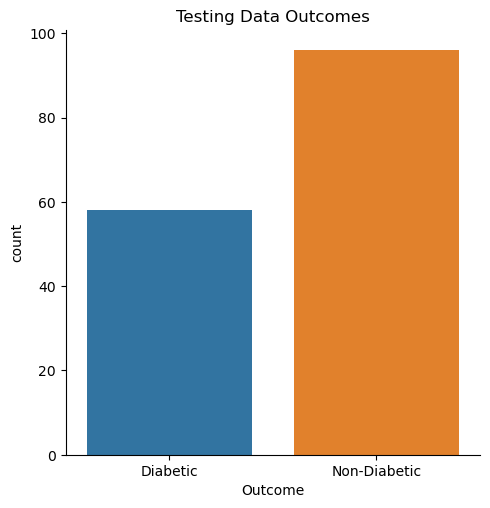

Outcome
Non-Diabetic    96
Diabetic        58
Name: count, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

x = dfknn.drop(columns='Outcome')
y = dfknn['Outcome']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y, test_size=0.2, random_state=123)


forGraph = Xtest.copy()

forGraph.insert(8, "Outcome", Ytest)

sns.catplot(data=forGraph, x="Outcome", kind="count")
plt.title("Testing Data Outcomes")


plt.show()
counts = forGraph['Outcome'].value_counts()
print(counts)

### Initial Run
I will run KNN with an initial value of 30, like in project 1. 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(Xtrain, Ytrain)
ypred = knn.predict(Xtest)

### Evaluating initial run

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

print(confusion_matrix(Ytest, ypred))
print(classification_report(Ytest, ypred))
print(accuracy_score(ypred, Ytest))

[[39 19]
 [ 8 88]]
              precision    recall  f1-score   support

    Diabetic       0.83      0.67      0.74        58
Non-Diabetic       0.82      0.92      0.87        96

    accuracy                           0.82       154
   macro avg       0.83      0.79      0.80       154
weighted avg       0.83      0.82      0.82       154

0.8246753246753247


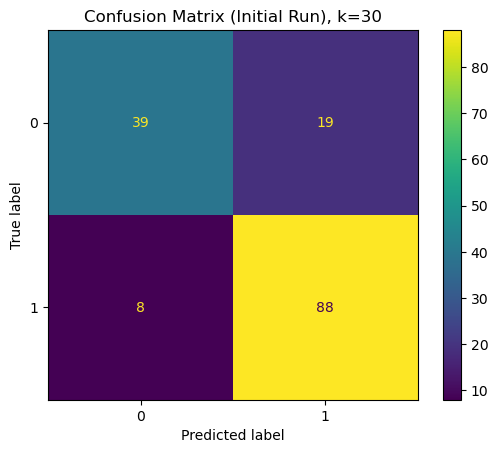

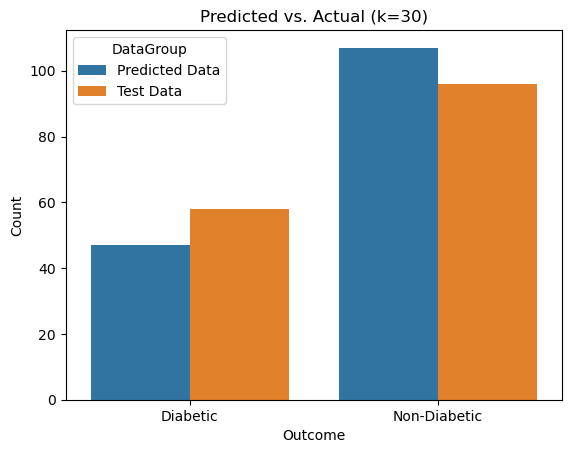

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Ytest, ypred))
disp.plot()
plt.title("Confusion Matrix (Initial Run), k=30")
plt.show()

bg = pd.DataFrame({"actual":Ytest, "predicted": ypred})

testCountD = (bg['actual']=="Diabetic").sum()
testCountND = (bg['actual']=="Non-Diabetic").sum()
predCountD = (bg['predicted']=="Diabetic").sum()
predCountND = (bg['predicted']=="Non-Diabetic").sum()

bg2 = pd.DataFrame({"DataGroup": ["Predicted Data", "Test Data", "Predicted Data", "Test Data"], 
                    "Count":[predCountD, testCountD, predCountND, testCountND], 
                    "Outcome": ["Diabetic", "Diabetic", "Non-Diabetic", "Non-Diabetic"]})

sns.barplot(x="Outcome", y="Count", hue="DataGroup", data=bg2)
plt.title("Predicted vs. Actual (k=30)")
plt.show()


### Comments

After an initial run, I was able to achieve an ~82% accuracy! This is already higher than the accuracy from project 1's initial run (80.5%). 

In project 1, I removed three variables (pregnancies, pedigree, skin thickness), and it actually yielded a higher accuracy. I'm curious if it will do the same in this model. 

## Experimenting with variables to improve the model

In a previous section, I looked at all of the variables against the outcome. I noticed that pedigree, pregnancies, and skin thickness did not have much of an effect. I will remove these variables to see how it affects the accuracy of the model. 

[[46 12]
 [12 84]]
              precision    recall  f1-score   support

    Diabetic       0.79      0.79      0.79        58
Non-Diabetic       0.88      0.88      0.88        96

    accuracy                           0.84       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.84      0.84      0.84       154

0.8441558441558441


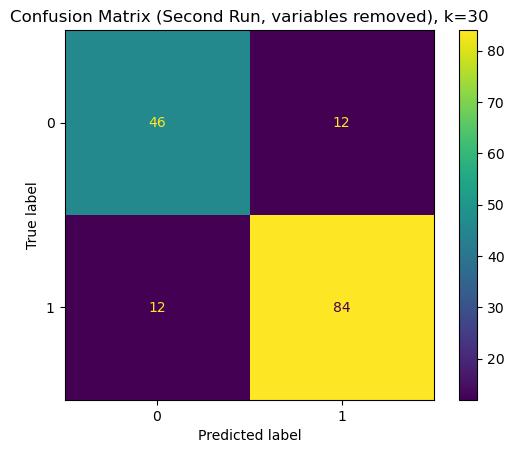

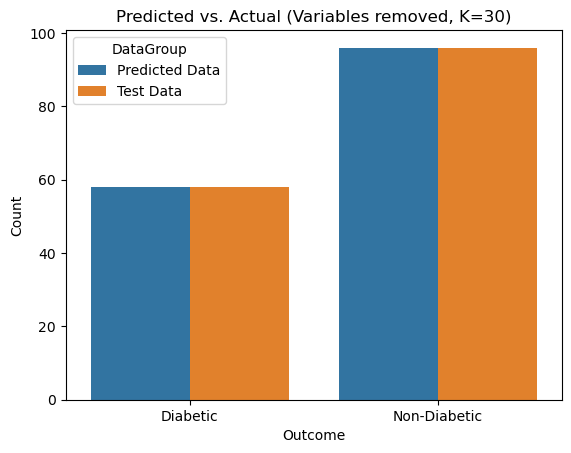

In [37]:
Xtrain1 = Xtrain.copy()
Xtest1 = Xtest.copy()
Ytrain1 = Ytrain.copy()
Ytest1 = Ytest.copy()

Xtrain1 = Xtrain1.drop(columns = ["Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"])
Xtest1 = Xtest1.drop(columns = ["Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"])
Ytrain1 = Ytrain1.drop(columns = ["Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"])
Ytest1 = Ytest1.drop(columns = ["Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"])

knn2 = KNeighborsClassifier(n_neighbors=30)
knn2.fit(Xtrain1, Ytrain1)
ypred2 = knn2.predict(Xtest1)

print(confusion_matrix(Ytest1, ypred2))
print(classification_report(Ytest1, ypred2))
print(accuracy_score(ypred2, Ytest1))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Ytest1, ypred2))
disp.plot()
plt.title("Confusion Matrix (Second Run, variables removed), k=30")
plt.show()

bg3 = pd.DataFrame({"actual":Ytest1, "predicted": ypred2})

testCountD2 = (bg3['actual']=="Diabetic").sum()
testCountND2 = (bg3['actual']=="Non-Diabetic").sum()
predCountD2 = (bg3['predicted']=="Diabetic").sum()
predCountND2 = (bg3['predicted']=="Non-Diabetic").sum()

bg4 = pd.DataFrame({"DataGroup": ["Predicted Data", "Test Data", "Predicted Data", "Test Data"], 
                    "Count":[predCountD2, testCountD2, predCountND2, testCountND2], 
                    "Outcome": ["Diabetic", "Diabetic", "Non-Diabetic", "Non-Diabetic"]})

sns.barplot(x="Outcome", y="Count", hue="DataGroup", data=bg4)
plt.title("Predicted vs. Actual (Variables removed, K=30)")
plt.show()



## Comments
After removing those three vairables, I was able to acheive an even higher accuracy. In project 1, I was able to achieve only a ~0.6% increase. In this run, it was increased ~2%! 

The bar graph shows predicted data and test data having the same number of diabetics and non-diabetics, but there are 24 rows that were incorrectly predicted (as also indicated from the confusion matrix at 12 each)

In [39]:
bg5 = bg3[bg3['actual'] != bg3['predicted']]

bg5

actual     predicted
91   Non-Diabetic      Diabetic
328      Diabetic  Non-Diabetic
542      Diabetic  Non-Diabetic
397      Diabetic  Non-Diabetic
242      Diabetic  Non-Diabetic
706      Diabetic  Non-Diabetic
246  Non-Diabetic      Diabetic
549  Non-Diabetic      Diabetic
78       Diabetic  Non-Diabetic
171      Diabetic  Non-Diabetic
345  Non-Diabetic      Diabetic
131      Diabetic  Non-Diabetic
731      Diabetic  Non-Diabetic
217  Non-Diabetic      Diabetic
327  Non-Diabetic      Diabetic
54   Non-Diabetic      Diabetic
107  Non-Diabetic      Diabetic
668  Non-Diabetic      Diabetic
657  Non-Diabetic      Diabetic
48       Diabetic  Non-Diabetic
658  Non-Diabetic      Diabetic
476      Diabetic  Non-Diabetic
673  Non-Diabetic      Diabetic
188      Diabetic  Non-Diabetic

## Optimizing K value
The previous tests were ran at a k value of 30. This number was chosen arbitrarily (same number from project 1). 
In this section, I will run a loop going from k=1 to 300 to find out which K value is optimal. 

In [41]:
currentK = 1
currentAcc = 0
bestAcc = 0
bestK = 0
accList = []
kList= []
for i in range(1, 301):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(Xtrain1, Ytrain1)
    ypred2 = knn2.predict(Xtest1)
    currentAcc = accuracy_score(ypred2, Ytest1)
    kList.append(i)
    accList.append(currentAcc)
    if currentAcc > bestAcc:
        bestAcc = currentAcc
        bestK = i
        ypredFinal = ypred2
        


optimalKdf = pd.DataFrame({"K": kList, "Accuracy": accList})
optimalKdf = optimalKdf.sort_values(by=['Accuracy'], ascending=False)

optimalKdf.head(10)



K  Accuracy
8    9  0.857143
12  13  0.850649
10  11  0.850649
15  16  0.844156
14  15  0.844156
13  14  0.844156
11  12  0.844156
29  30  0.844156
31  32  0.844156
30  31  0.837662

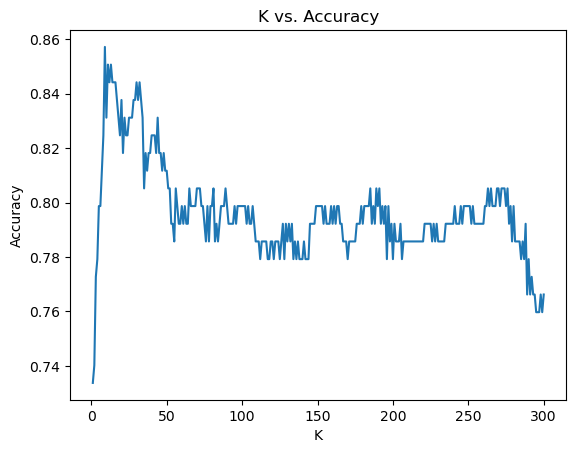

In [42]:
sns.lineplot(x="K", y="Accuracy", data=optimalKdf)
plt.title("K vs. Accuracy")
plt.show()

[[50  8]
 [14 82]]
              precision    recall  f1-score   support

    Diabetic       0.78      0.86      0.82        58
Non-Diabetic       0.91      0.85      0.88        96

    accuracy                           0.86       154
   macro avg       0.85      0.86      0.85       154
weighted avg       0.86      0.86      0.86       154

0.8571428571428571


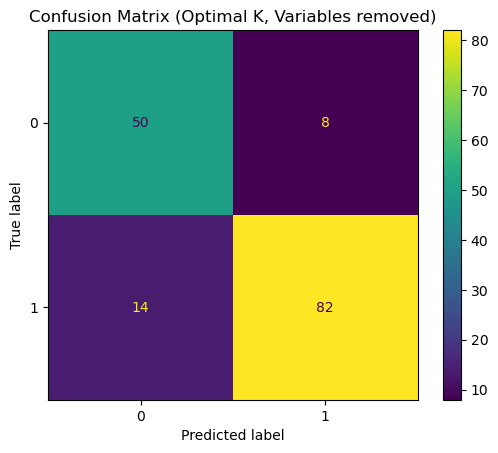

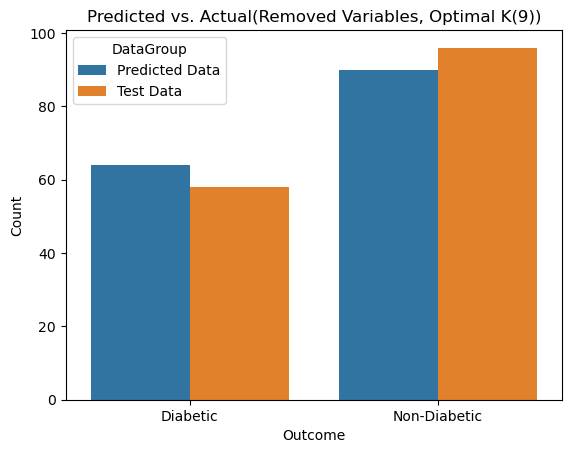

In [43]:
print(confusion_matrix(Ytest1, ypredFinal))
print(classification_report(Ytest1, ypredFinal))
print(accuracy_score(ypredFinal, Ytest1))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Ytest1, ypredFinal))
disp.plot()
plt.title("Confusion Matrix (Optimal K, Variables removed)")
plt.show()

bg3 = pd.DataFrame({"actual":Ytest1, "predicted": ypredFinal})

testCountD2 = (bg3['actual']=="Diabetic").sum()
testCountND2 = (bg3['actual']=="Non-Diabetic").sum()
predCountD2 = (bg3['predicted']=="Diabetic").sum()
predCountND2 = (bg3['predicted']=="Non-Diabetic").sum()

bg4 = pd.DataFrame({"DataGroup": ["Predicted Data", "Test Data", "Predicted Data", "Test Data"], 
                    "Count":[predCountD2, testCountD2, predCountND2, testCountND2], 
                    "Outcome": ["Diabetic", "Diabetic", "Non-Diabetic", "Non-Diabetic"]})

sns.barplot(x="Outcome", y="Count", hue="DataGroup", data=bg4)
plt.title("Predicted vs. Actual(Removed Variables, Optimal K(9))")
plt.show()

### Comments
The optimal K value is 9 which yields an accuracy of 85.7%. <br>
In comparison, the K value from project 1 was 15, which yeilded an accuracy of 84.4%

## Using optimal K before removing variables
In project 1, I decided to see what would the accuracy be if variables were never removed (Pregnancies, SkinThickness, DiabetesPedigreeFunction) The difference was ~8% in project 1. I will be doing the same here.

[[49  9]
 [ 9 87]]
              precision    recall  f1-score   support

    Diabetic       0.84      0.84      0.84        58
Non-Diabetic       0.91      0.91      0.91        96

    accuracy                           0.88       154
   macro avg       0.88      0.88      0.88       154
weighted avg       0.88      0.88      0.88       154

0.8831168831168831


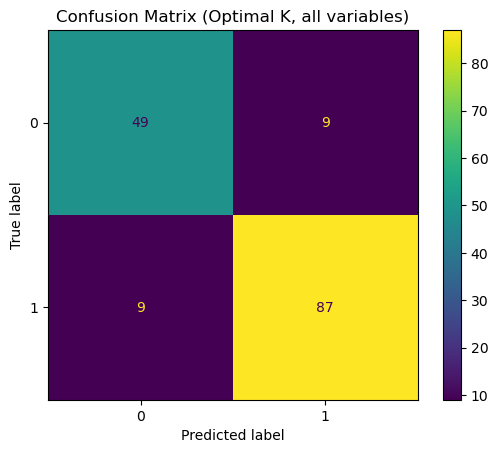

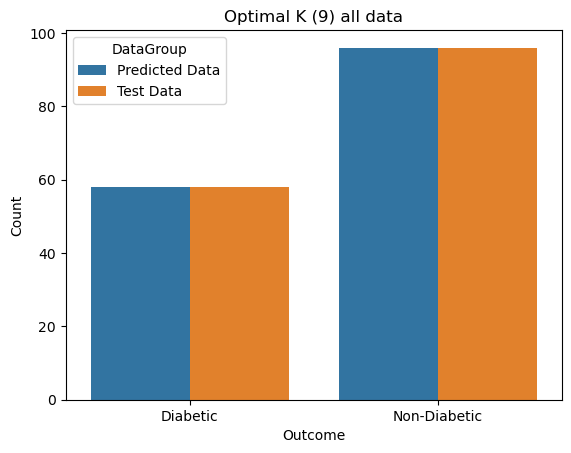

actual     predicted
41   Non-Diabetic      Diabetic
541      Diabetic  Non-Diabetic
328      Diabetic  Non-Diabetic
397      Diabetic  Non-Diabetic
242      Diabetic  Non-Diabetic
549  Non-Diabetic      Diabetic
78       Diabetic  Non-Diabetic
171      Diabetic  Non-Diabetic
327  Non-Diabetic      Diabetic
54   Non-Diabetic      Diabetic
107  Non-Diabetic      Diabetic
668  Non-Diabetic      Diabetic
657  Non-Diabetic      Diabetic
48       Diabetic  Non-Diabetic
164      Diabetic  Non-Diabetic
274  Non-Diabetic      Diabetic
476      Diabetic  Non-Diabetic
673  Non-Diabetic      Diabetic

In [46]:
knn3 = KNeighborsClassifier(n_neighbors=bestK)
knn3.fit(Xtrain, Ytrain)
ypred5 = knn3.predict(Xtest)

print(confusion_matrix(Ytest, ypred5))
print(classification_report(Ytest, ypred5))
print(accuracy_score(ypred5, Ytest))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Ytest, ypred5))
disp.plot()
plt.title("Confusion Matrix (Optimal K, all variables)")
plt.show()

bg3 = pd.DataFrame({"actual":Ytest, "predicted": ypred5})

testCountD2 = (bg3['actual']=="Diabetic").sum()
testCountND2 = (bg3['actual']=="Non-Diabetic").sum()
predCountD2 = (bg3['predicted']=="Diabetic").sum()
predCountND2 = (bg3['predicted']=="Non-Diabetic").sum()

bg4 = pd.DataFrame({"DataGroup": ["Predicted Data", "Test Data", "Predicted Data", "Test Data"], 
                    "Count":[predCountD2, testCountD2, predCountND2, testCountND2], 
                    "Outcome": ["Diabetic", "Diabetic", "Non-Diabetic", "Non-Diabetic"]})

sns.barplot(x="Outcome", y="Count", hue="DataGroup", data=bg4)
plt.title("Optimal K (9) all data")
plt.show()


bg5 = bg3[bg3['actual'] != bg3['predicted']]

bg5

### Comments

The result is surprisingly a lot higher than what was reported in project 1! <br>
Furthermore, it's actually higher than the test data without the 3 removed variables(88.3% vs. 85.7%). 

I wonder if sklearn's KNN is just implemented better than the module used in RStudio (class). 


# Using Logistic Regression to predict diabeties
Logistic regression is a binary classification method that predicts the probability of an event happening. It is a uspervised machine learning model, like k nearest neighbors. 

I will split the data 80/20. 80% will be used to train the model, and 20% will be used to test the model.

In [49]:
dflogr

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0             72             35    169.5  33.6   
1              1     85.0             66             29    105.0  26.6   
2              8    183.0             64             33    169.5  23.3   
3              1     89.0             66             23     94.0  28.1   
4              0    137.0             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0             76             48    180.0  32.9   
764            2    122.0             70             27    105.0  36.8   
765            5    121.0             72             23    112.0  26.2   
766            1    126.0             60             33    169.5  30.1   
767            1     93.0             70             31    105.0  30.4   

     DiabetesPedigreeFunction  Age       Outcome  
0                       0.627   50      Diabetic  
1                       0.351   31  Non-Diabetic  
2                       0.672   32      Diabetic  
3                       0.167   21  Non-Diabetic  
4                       2.288   33      Diabetic  
..                        ...  ...           ...  
763                     0.171   63  Non-Diabetic  
764                     0.340   27  Non-Diabetic  
765                     0.245   30  Non-Diabetic  
766                     0.349   47      Diabetic  
767                     0.315   23  Non-Diabetic  

[768 rows x 9 columns]

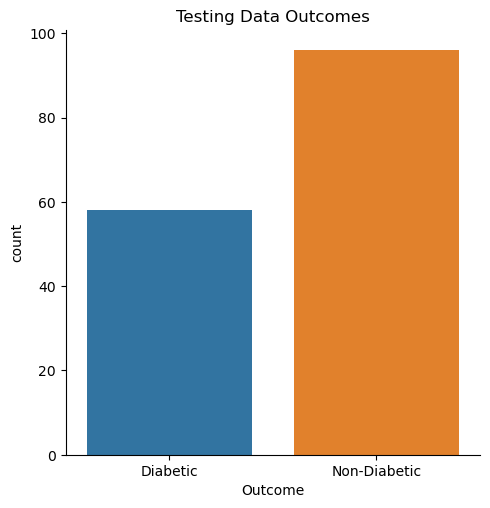

Outcome
Non-Diabetic    96
Diabetic        58
Name: count, dtype: int64


In [50]:
##normalize data

for column in dflogr.columns:
    if column == "Outcome":
        continue
    dflogr[column] = (dflogr[column] - dflogr[column].min()) / (dflogr[column].max() - dflogr[column].min())

x = dflogr.drop(columns='Outcome')
y = dflogr['Outcome']

XtrainL, XtestL, YtrainL, YtestL = train_test_split(x,y, test_size=0.2, random_state=123) ##using same random state as before



forGraph = XtestL.copy()

forGraph.insert(8, "Outcome", YtestL)

sns.catplot(data=forGraph, x="Outcome", kind="count")
plt.title("Testing Data Outcomes")


plt.show()
counts = forGraph['Outcome'].value_counts()
print(counts)

### Comments
Since I used the same random_state as before, the data for our test and train is identical to the one ran with KNN.



## Initial Run

0.8051948051948052
              precision    recall  f1-score   support

    Diabetic       0.80      0.64      0.71        58
Non-Diabetic       0.81      0.91      0.85        96

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154



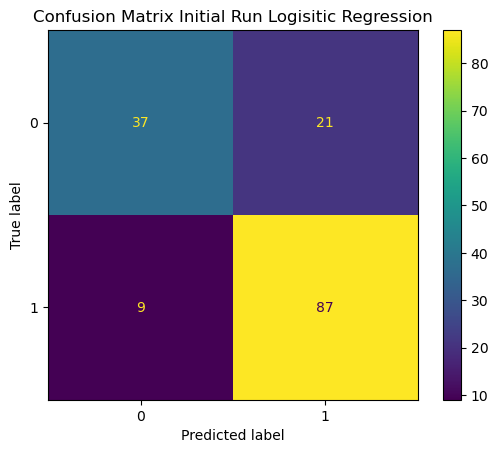

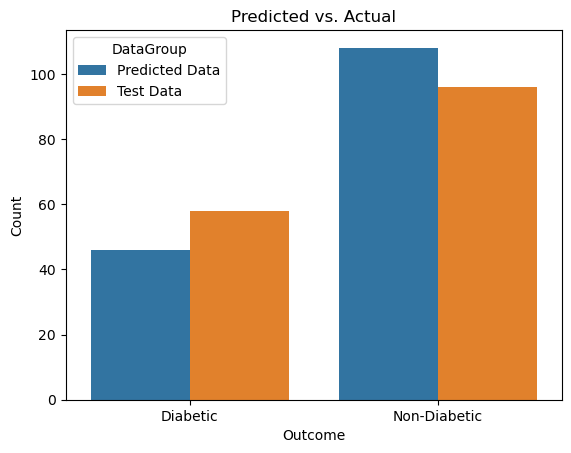

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 123)
lr.fit(XtrainL, YtrainL)
ypredL = lr.predict(XtestL)


accL = accuracy_score(YtestL, ypredL)
print(accL)
print(classification_report(YtestL,ypredL))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(YtestL, ypredL))
disp.plot()
plt.title("Confusion Matrix Initial Run Logisitic Regression")
plt.show()

bgL = pd.DataFrame({"actual":YtestL, "predicted": ypredL})

testCountDL = (bgL['actual']=="Diabetic").sum()
testCountNDL = (bgL['actual']=="Non-Diabetic").sum()
predCountDL = (bgL['predicted']=="Diabetic").sum()
predCountNDL = (bgL['predicted']=="Non-Diabetic").sum()

bgL2 = pd.DataFrame({"DataGroup": ["Predicted Data", "Test Data", "Predicted Data", "Test Data"], 
                    "Count":[predCountDL, testCountDL, predCountNDL, testCountNDL], 
                    "Outcome": ["Diabetic", "Diabetic", "Non-Diabetic", "Non-Diabetic"]})

sns.barplot(x="Outcome", y="Count", hue="DataGroup", data=bgL2)
plt.title("Predicted vs. Actual")
plt.show()

## Removing variables
Just like in project 1, and in the KNN section of this notebook, I will remove variables to see if there is any effect on accuracy the model. I will be removing the same variables (skin thickness, pedigree, pregnancies). 

[[34 24]
 [ 7 89]]
              precision    recall  f1-score   support

    Diabetic       0.83      0.59      0.69        58
Non-Diabetic       0.79      0.93      0.85        96

    accuracy                           0.80       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154

0.7987012987012987


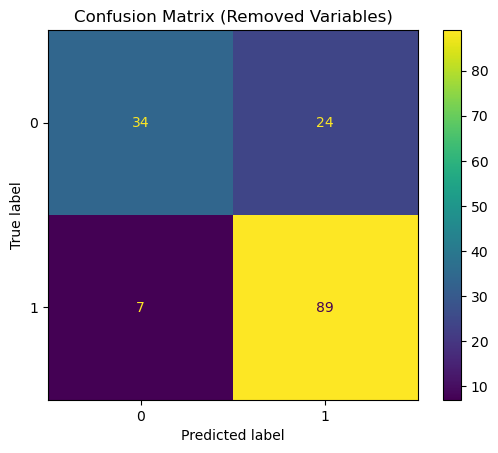

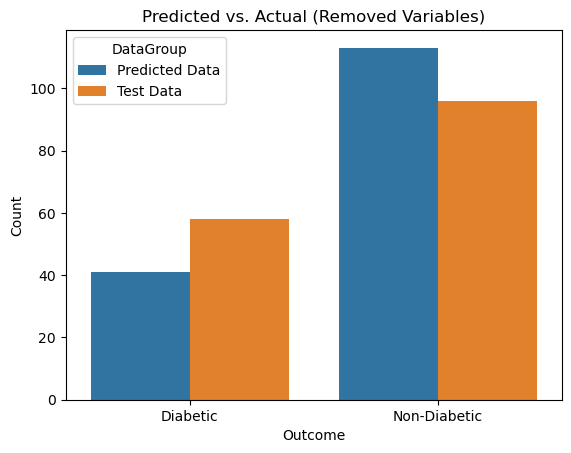

In [55]:
XtrainL1 = XtrainL.copy()
XtestL1 = XtestL.copy()
YtrainL1 = YtrainL.copy()
YtestL1 = YtestL.copy()

XtrainL1 = XtrainL1.drop(columns = ["Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"])
XtestL1 = XtestL1.drop(columns = ["Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"])
YtrainL1 = YtrainL1.drop(columns = ["Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"])
YtestL1 = YtestL1.drop(columns = ["Pregnancies", "SkinThickness", "DiabetesPedigreeFunction"])


lr2 = LogisticRegression(random_state = 123)
lr2.fit(XtrainL1, YtrainL1)
ypredL2 = lr2.predict(XtestL1)

print(confusion_matrix(YtestL1, ypredL2))
print(classification_report(YtestL1, ypredL2))
print(accuracy_score(ypredL2, YtestL1))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(YtestL1, ypredL2))
disp.plot()
plt.title("Confusion Matrix (Removed Variables)")
plt.show()

bg2L = pd.DataFrame({"actual":YtestL1, "predicted": ypredL2})

testCountD2L = (bg2L['actual']=="Diabetic").sum()
testCountND2L = (bg2L['actual']=="Non-Diabetic").sum()
predCountD2L = (bg2L['predicted']=="Diabetic").sum()
predCountND2L = (bg2L['predicted']=="Non-Diabetic").sum()

bg4L = pd.DataFrame({"DataGroup": ["Predicted Data", "Test Data", "Predicted Data", "Test Data"], 
                    "Count":[predCountD2L, testCountD2L, predCountND2L, testCountND2L], 
                    "Outcome": ["Diabetic", "Diabetic", "Non-Diabetic", "Non-Diabetic"]})

sns.barplot(x="Outcome", y="Count", hue="DataGroup", data=bg4L)
plt.title("Predicted vs. Actual (Removed Variables)")
plt.show()


## Comments
The accuracy decreased as a result, but not by much. I will be keeping the original results with all data (80.5% accuracy)

# Visualization 

In [58]:
XtestFinal = Xtest.copy()

XtestFinal.insert(8, "Predicted", ypred5)
XtestFinal.insert(9, "Outcome", Ytest)

def visualDiabetes(df, xcol, ycol): 
    
    def plotlabel(xvar, yvar, label):
        if label == "Diabetic": 
            ax.text(xvar+0.005, yvar, label, color="darkblue" )
        if label == "Non-Diabetic":
            ax.text(xvar+0.005, yvar, label, color="darkorange" )
        
    fig = plt.figure(figsize=(18,10))
    ax = sns.scatterplot(x = xcol, y = ycol, data=df, hue="Outcome", s=80)

    # The magic starts here:
    df.apply(lambda x: plotlabel(x[xcol],  x[ycol], x['Predicted']), axis=1)

    plt.title(f"{xcol} vs. {ycol}")
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    
XtestFinalL = XtestL.copy()

XtestFinalL.insert(8, "Predicted", ypredL)
XtestFinalL.insert(9, "Outcome", YtestL)

The graphs below indicate the true outcome in colors of points, and the text by the points indicates the prediction. 

For example, a blue point with a "Diabetic" label is a correctly predicted result. <br>
However, a blue point with a "Non-Diabetic" label is an incorrectly predicted result. 

<ul>
<li>Blue point + Diabetic label = Correct prediction</li>
<li>Blue point + Non-Diabetic label = Incorrect prediction</li>
<li>Orange point + Non-Diabetic label = Correct prediction</li>
<li>Orange point + Diabetic label = Incorrect prediction</li>
</ul>

## Logistic Regression 1
### Glucose vs. Blood Pressure

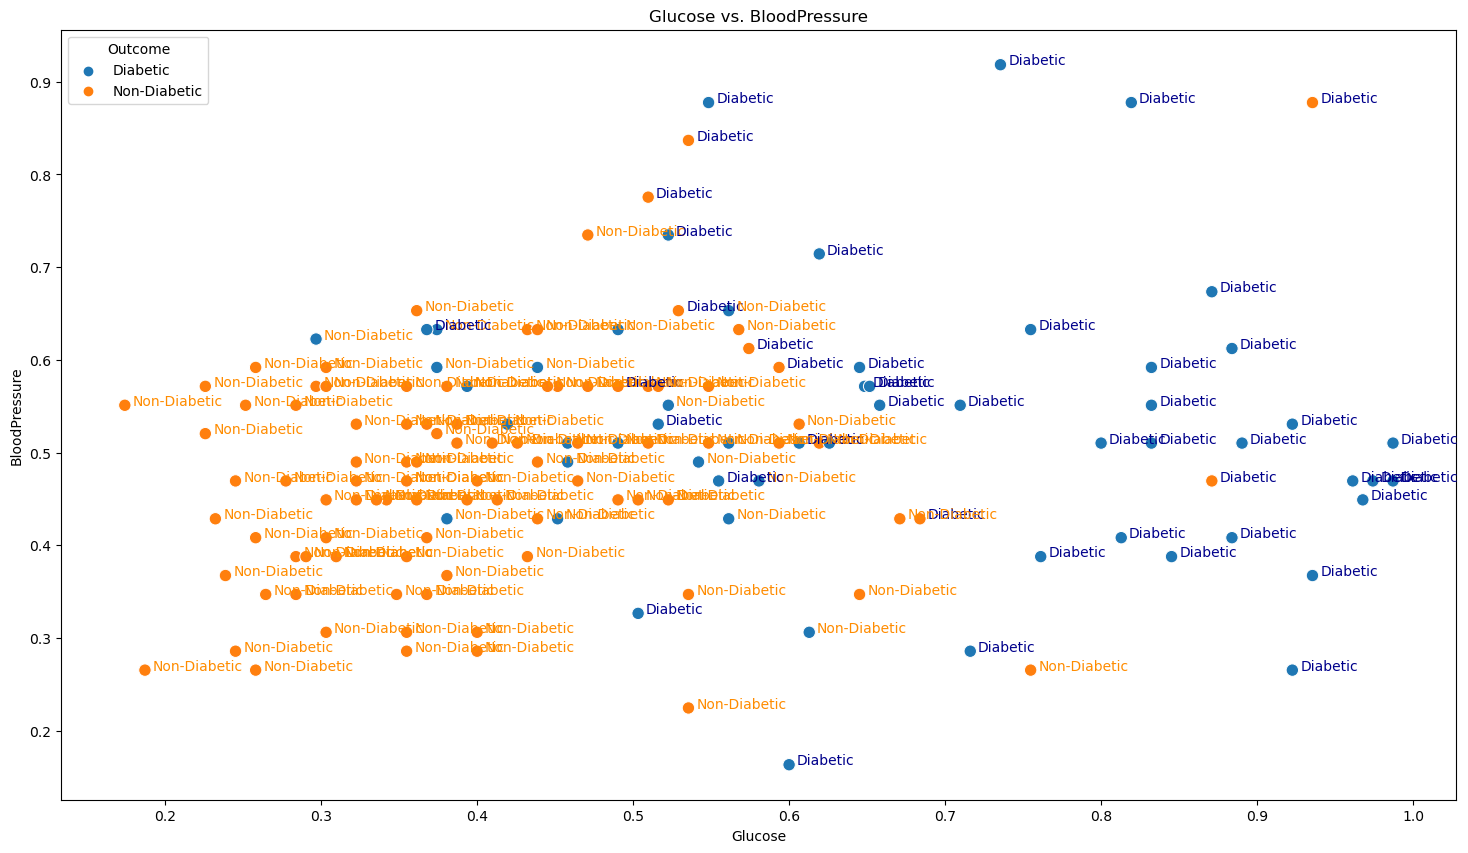

In [61]:
visualDiabetes(XtestFinalL, "Glucose", "BloodPressure")


## K Nearest Neighbor 1
### Glucose vs. Blood Pressure

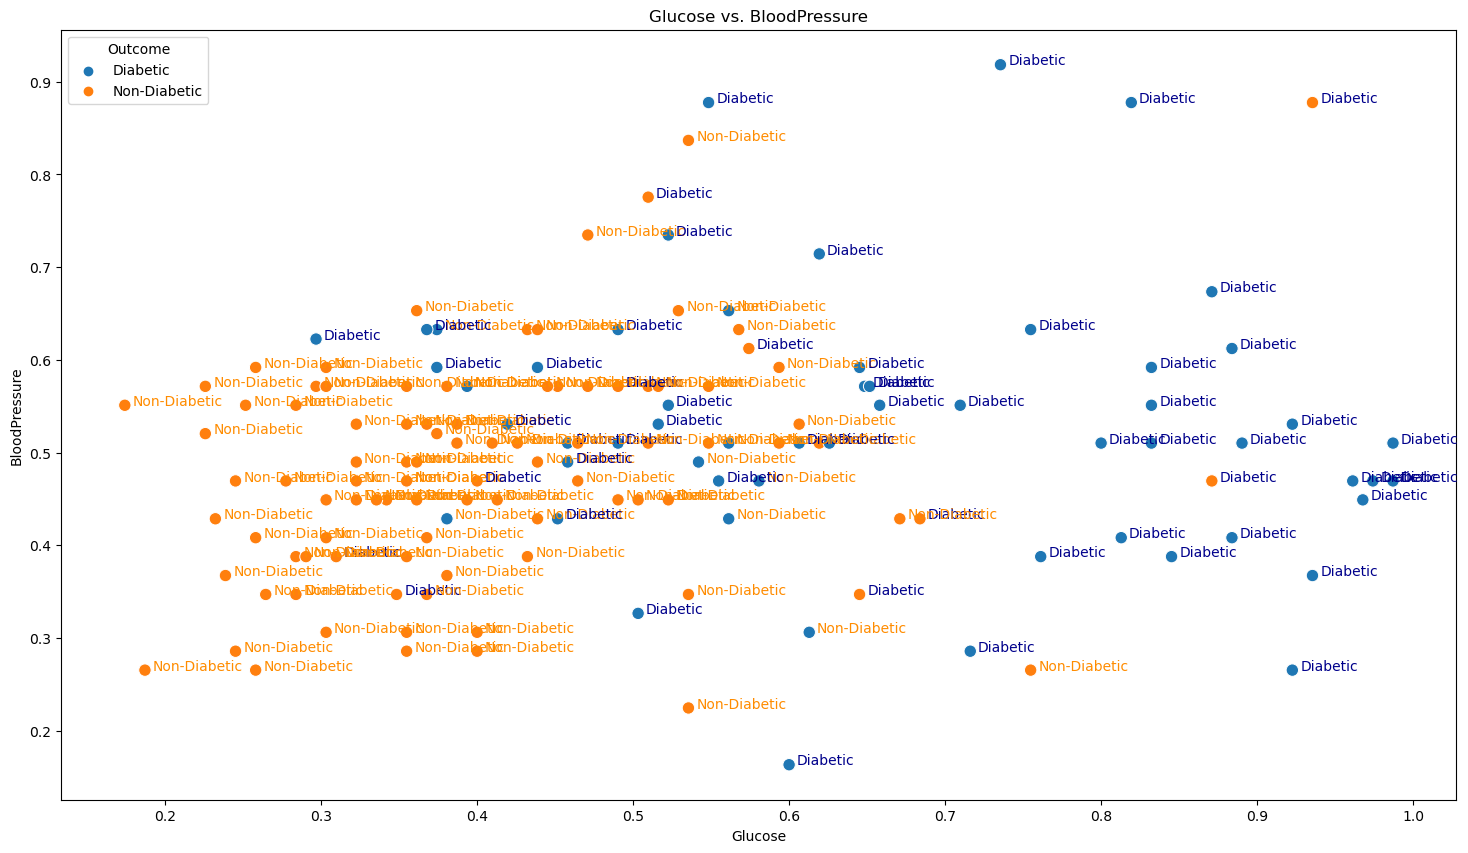

In [63]:
visualDiabetes(XtestFinal, "Glucose", "BloodPressure")

## Logistic Regression 2
### Glucose vs. BMI

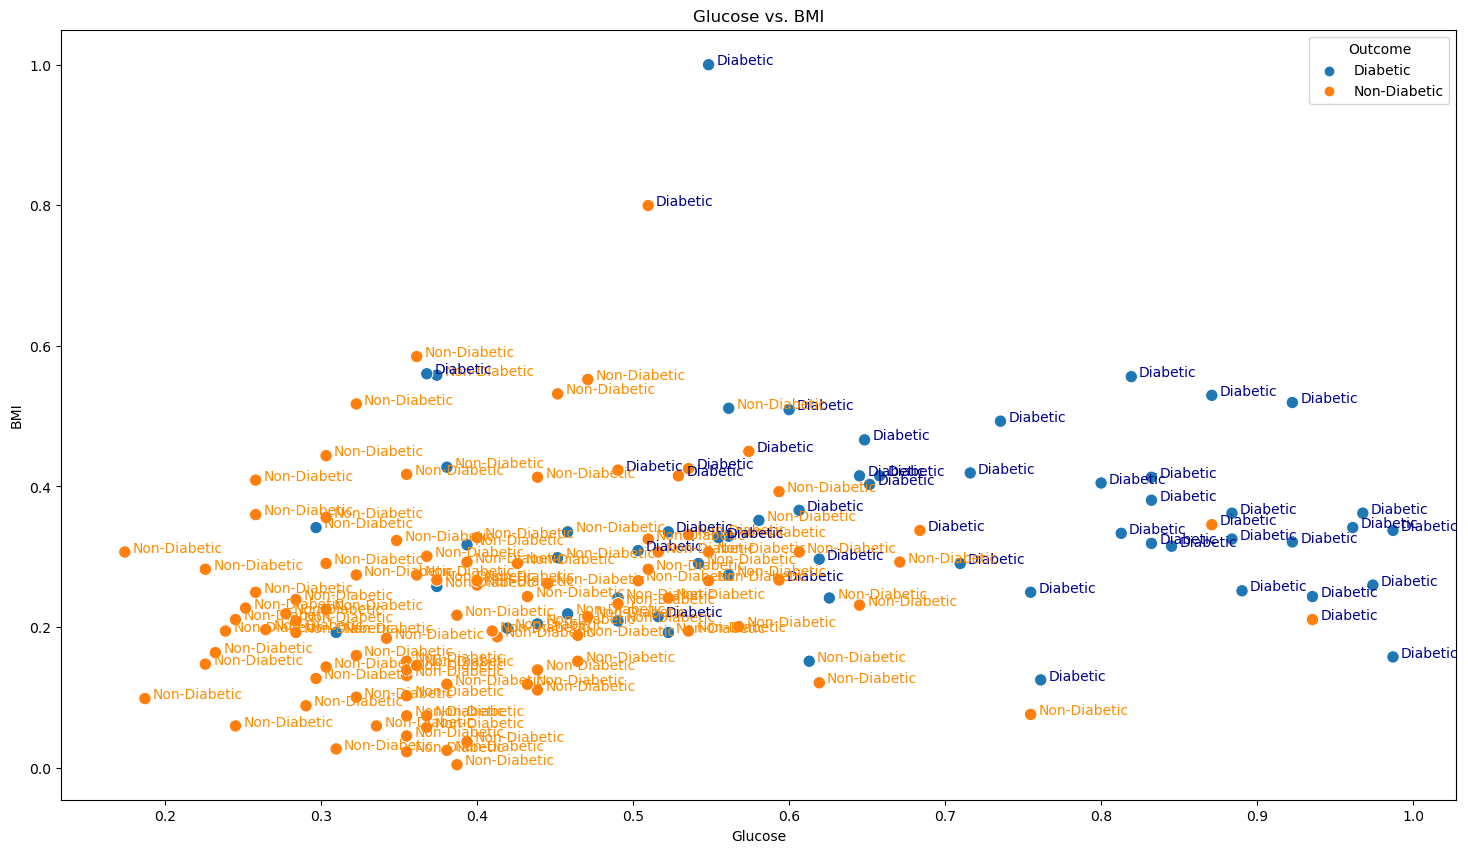

In [65]:
visualDiabetes(XtestFinalL, "Glucose", "BMI")


## K Nearest Neighbor 2
### Glucose vs. BMI

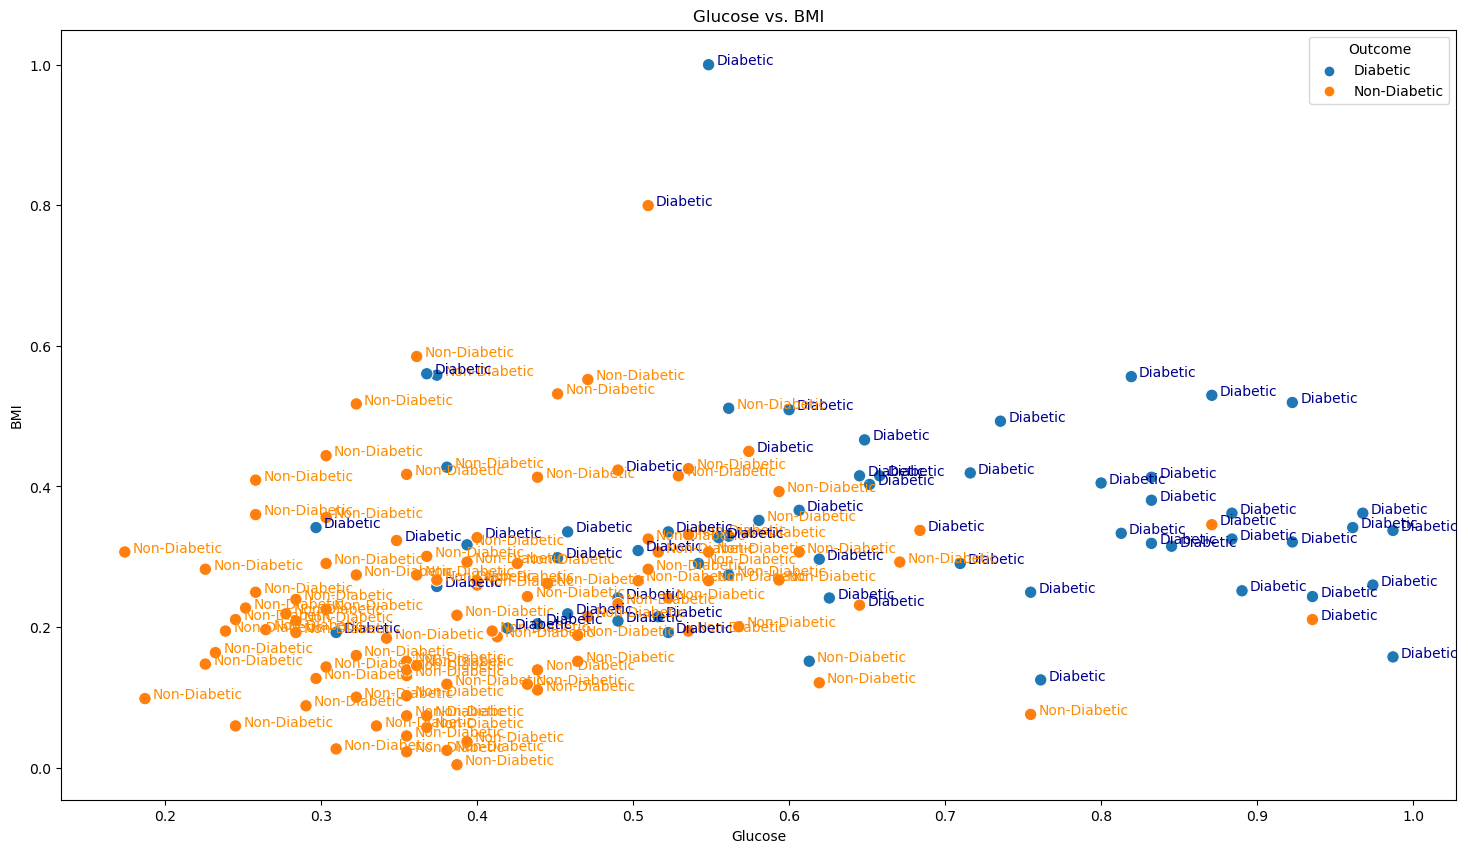

In [67]:
visualDiabetes(XtestFinal, "Glucose", "BMI")

## Logistic Regression 3
### Glucose vs. Insulin

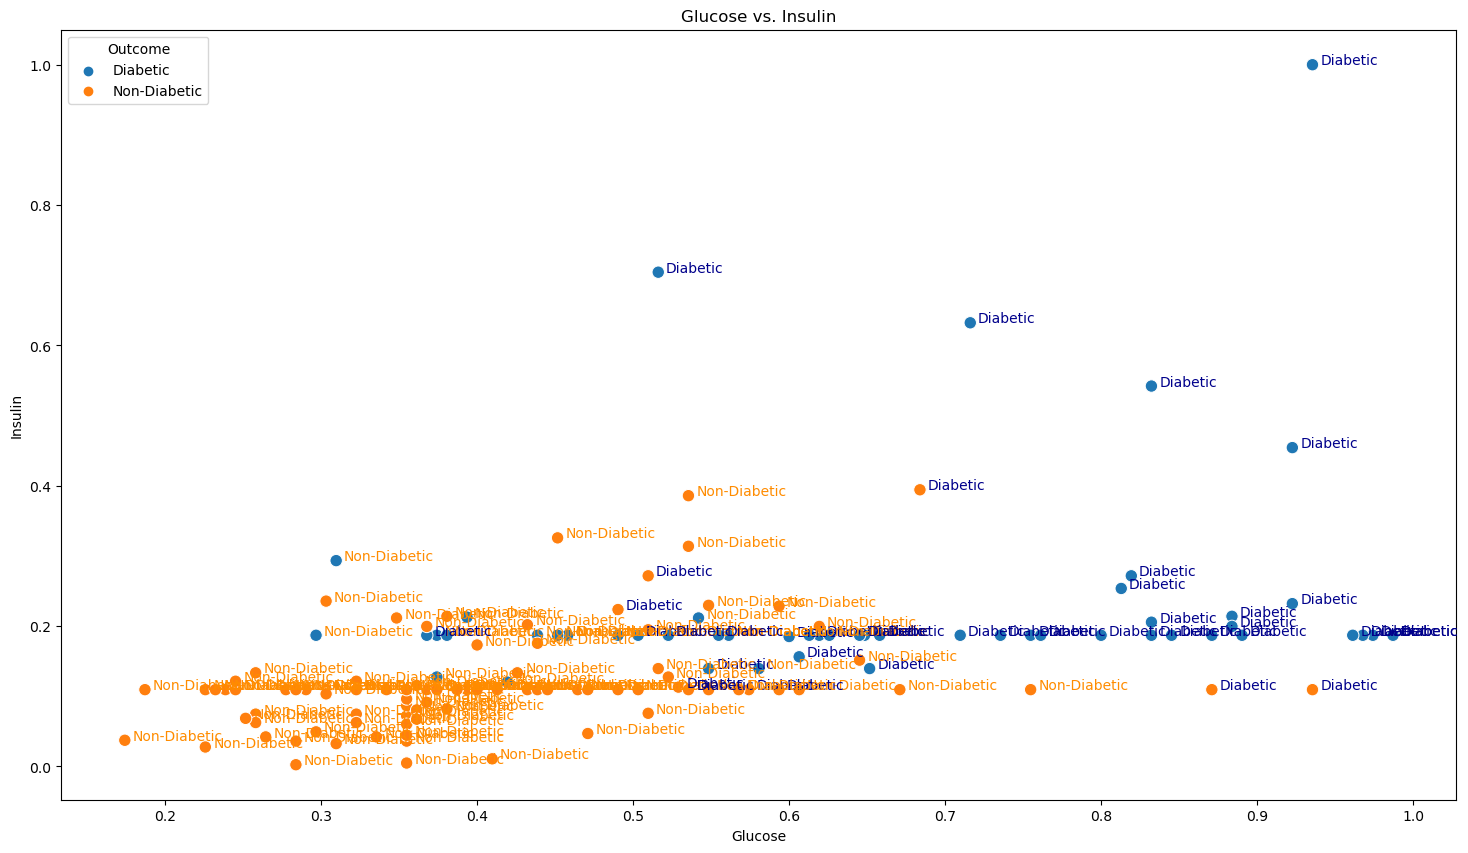

In [69]:
visualDiabetes(XtestFinalL, "Glucose", "Insulin")


## K Nearest Neighbor 3
### Glucose vs. Insulin

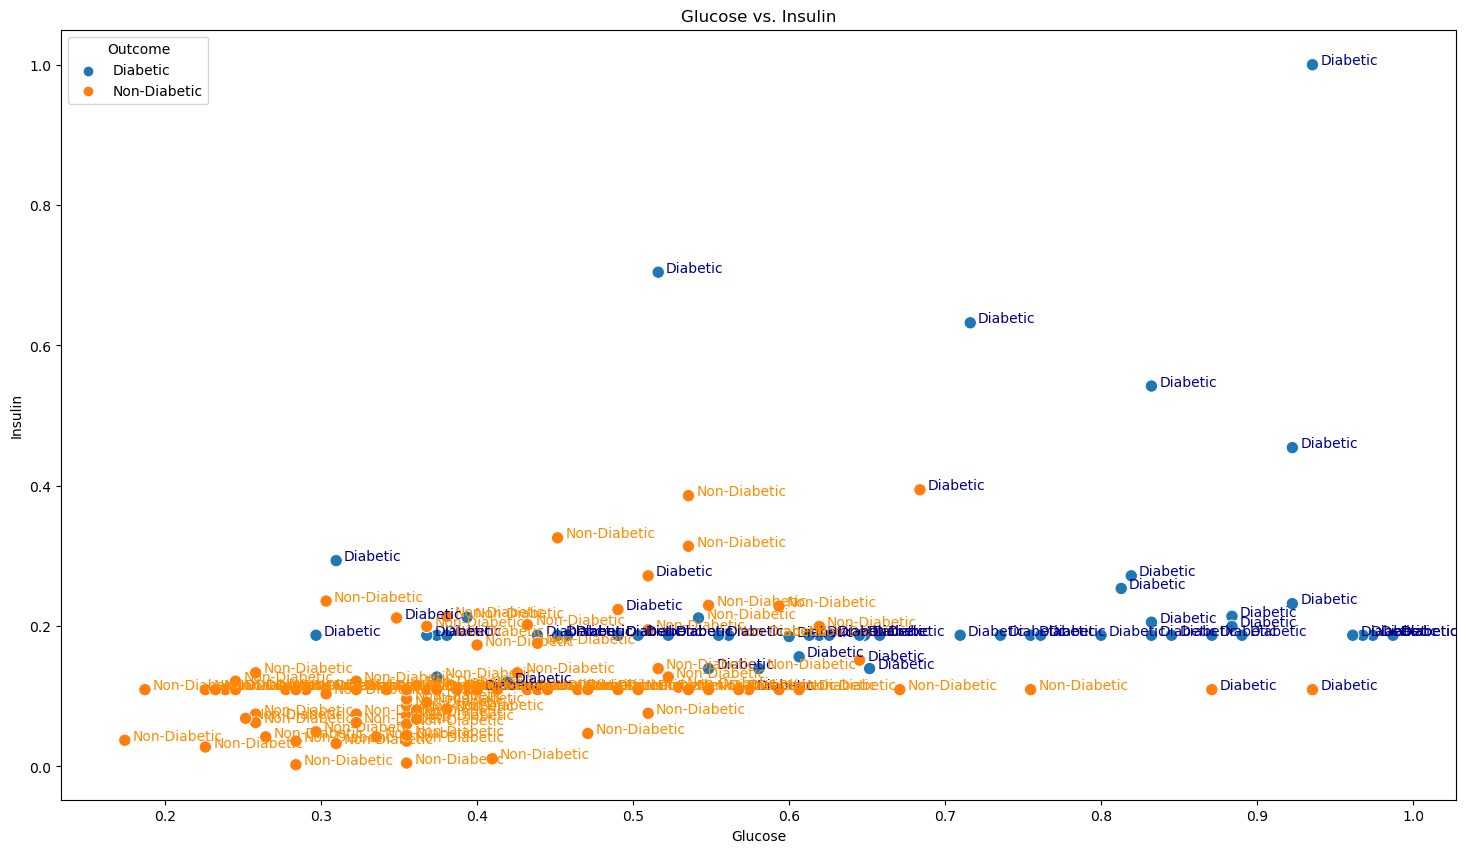

In [71]:
visualDiabetes(XtestFinal, "Glucose", "Insulin")

## Logistic Regression 4
### Age vs. Blood Pressure

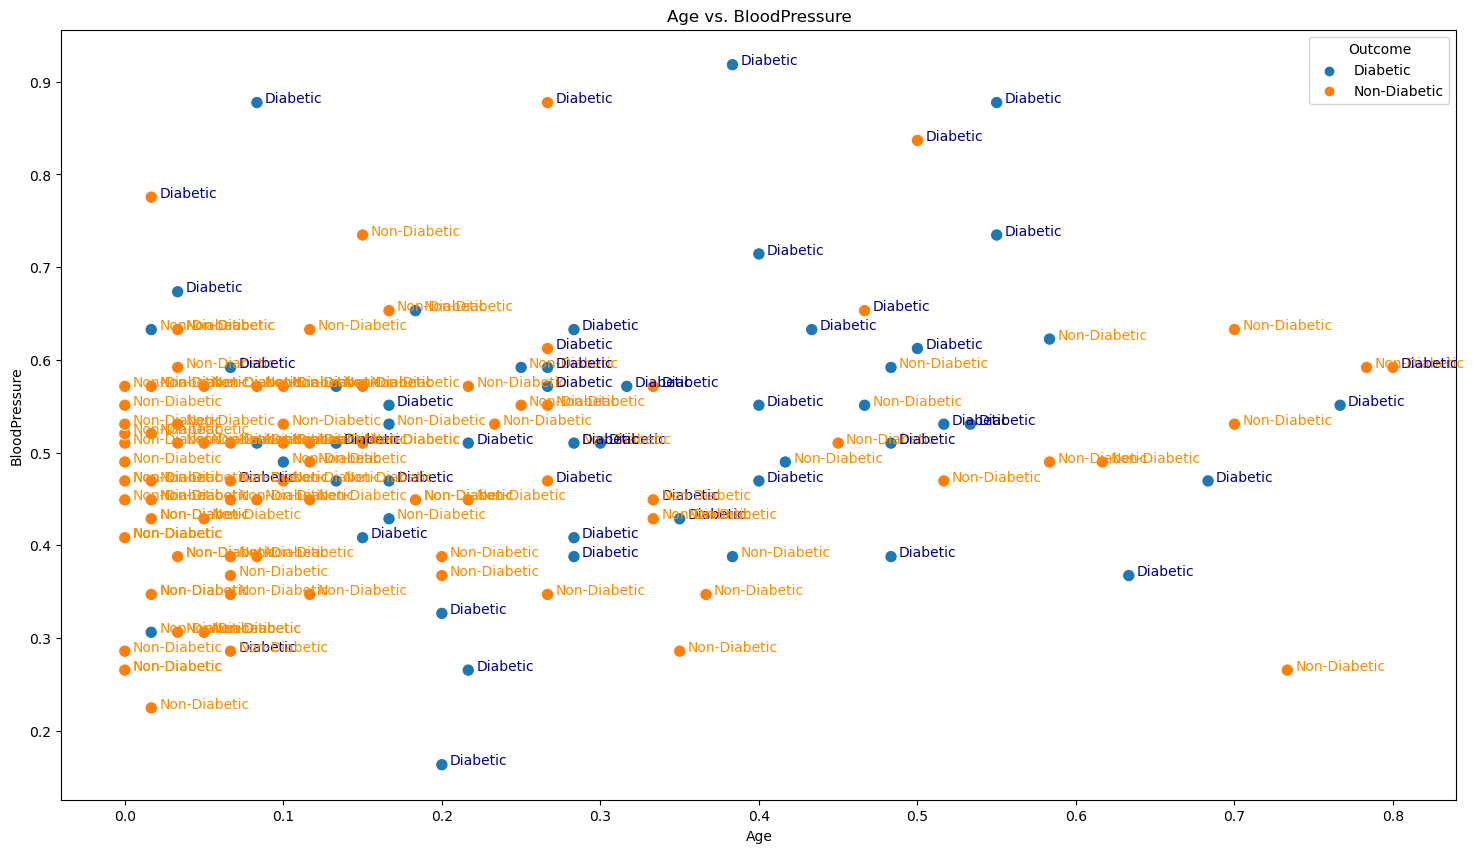

In [73]:
visualDiabetes(XtestFinalL, "Age", "BloodPressure")


## K Nearest Neighbor 4
### Age vs. Blood Pressure

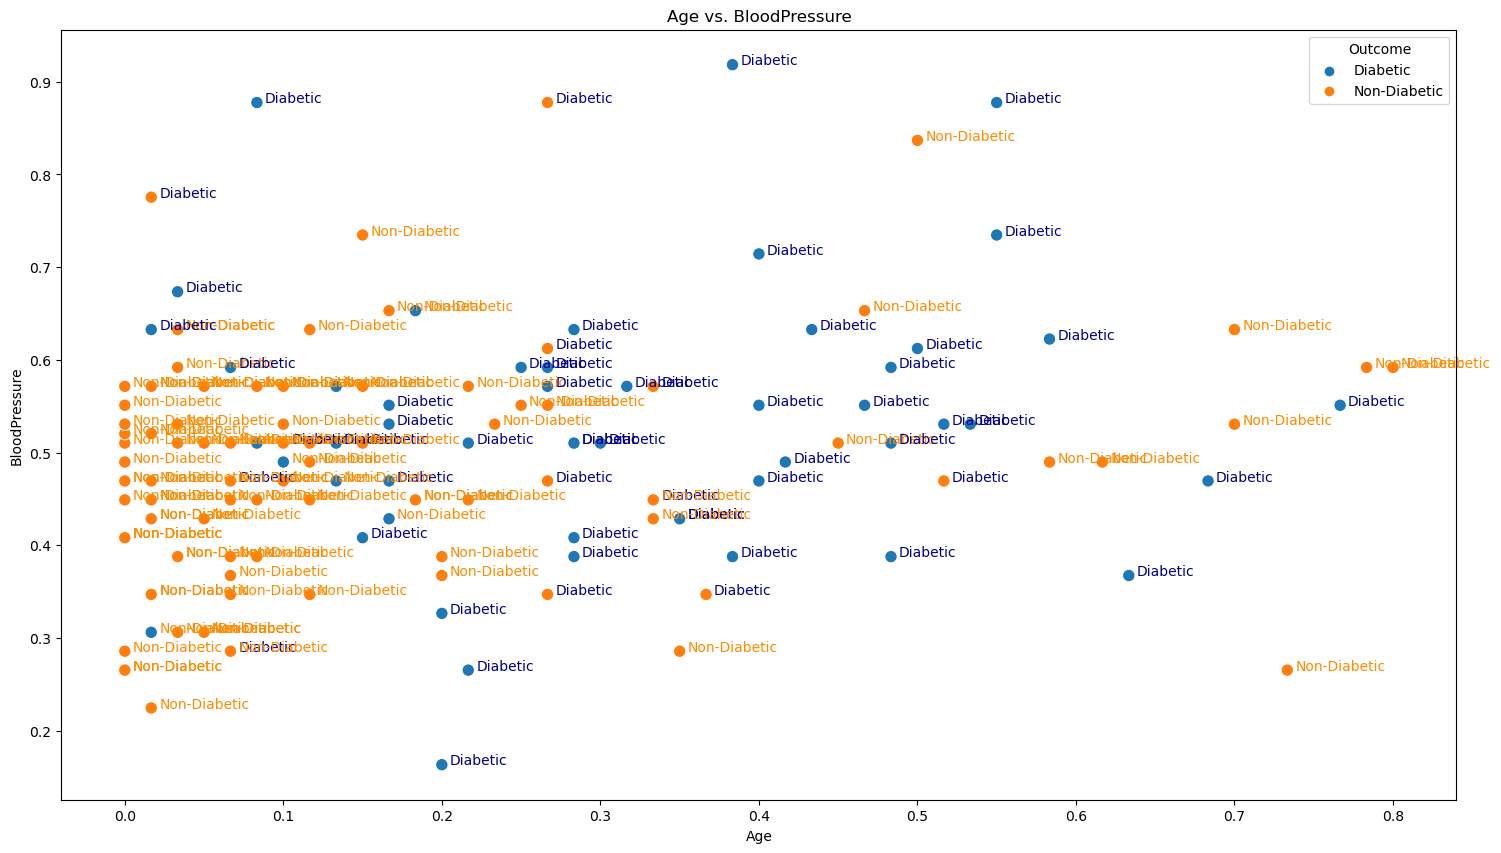

In [75]:
visualDiabetes(XtestFinal, "Age", "BloodPressure")

## Logistic Regression 5
### Age vs. Blood Pressure

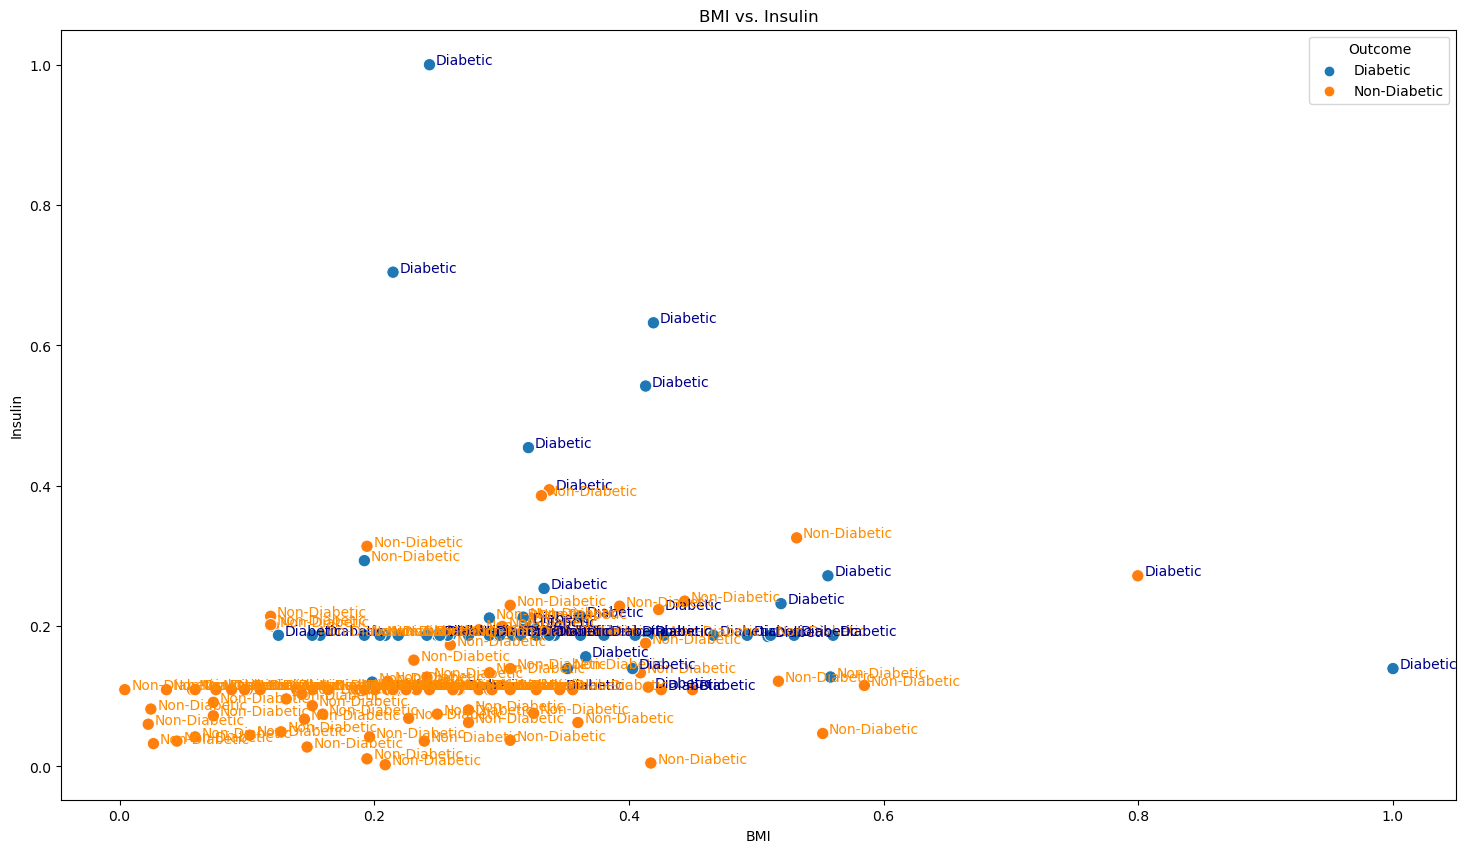

In [77]:
visualDiabetes(XtestFinalL, "BMI", "Insulin")


## K Nearest Neighbor 5
### Age vs. Blood Pressure

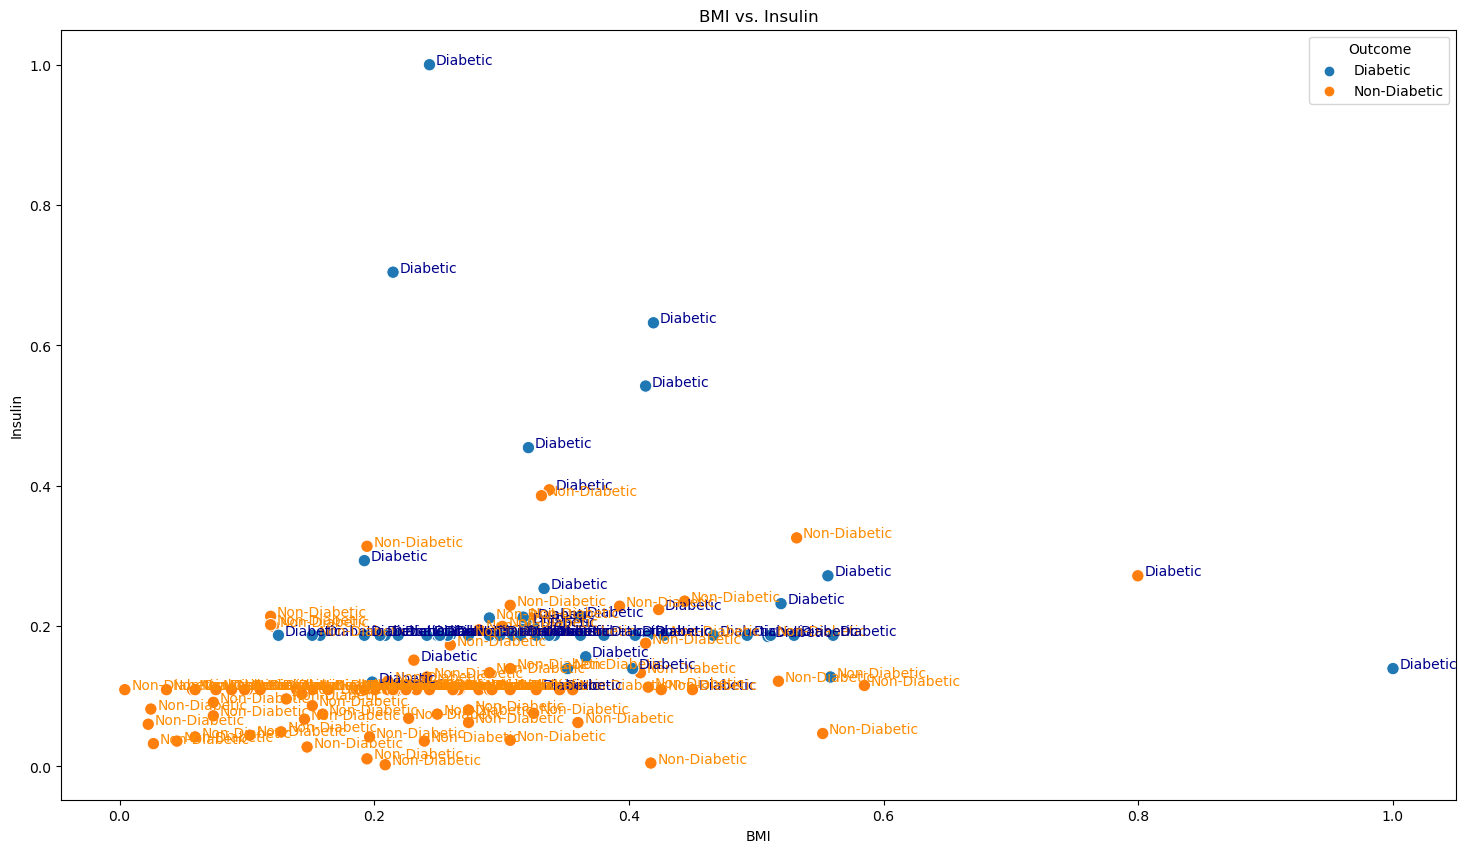

In [79]:
visualDiabetes(XtestFinal, "BMI", "Insulin")

## Conclusion
There are some small differences in the graphs. This is to be expected because their accuracies are very close (80% vs 88%).

In this project, I wanted to see if another classifcation method would be more accurate with the same data, and it turns out KNN was better for predicting diabetes. Logistic regression yeilded a less accurate model. 

To answer the initial question, yes, machine learning can be used to predict outcomes, and in this application, I used it to predict diabetes given some data. Machine learning can be used to predict a lot of other things, given some data, and can be powerful tools in many fields. 

Overall, with this dataset, I was able to get a higher accuracy with the K Nearest Neighbor method at 88%, which was higher than it's project 1 counterpart (84%). That's not to say KNN is better all the time, it all depends on the dataset and what one wants to accomplish with their data, and the questions they are asking.




## Dataset citation

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
from UCI Machine Learning & Kaggle